In [1]:
!pip install datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datasets import Dataset, load_dataset
import tensorflow as tf
import keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 42.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


# **Load the Data for Visualization**

In [2]:
emotions = load_dataset("emotion")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [3]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [4]:
train_ds = emotions["train"]
print(train_ds)

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})


In [5]:
val_ds = emotions["validation"]
print(val_ds)

Dataset({
    features: ['text', 'label'],
    num_rows: 2000
})


In [6]:
test_ds = emotions["test"]
print(test_ds)

Dataset({
    features: ['text', 'label'],
    num_rows: 2000
})


# **Visualize Data**

In [7]:
emotions.set_format(type="pandas")

In [8]:
df_train = emotions["train"][:]
df_train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [9]:
df_val = emotions["validation"][:]
df_val.head()

,text,label
0,im feeling quite sad and sorry for myself but ...,0
1,i feel like i am still looking at a blank canv...,0
2,i feel like a faithful servant,2
3,i am just feeling cranky and blue,3
4,i can have for a treat or if i am feeling festive,1


In [10]:
df_test = emotions["test"][:]
df_test.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0


In [11]:
def label_return(dataset_name, row):
  return emotions[dataset_name].features["label"].int2str(row)

In [12]:
df_train["emotion_name"] = df_train["label"].apply(lambda row: label_return("train", row))

df_val["emotion_name"] = df_val["label"].apply(lambda row: label_return("validation", row))

df_test["emotion_name"] = df_test["label"].apply(lambda row: label_return("test", row))

In [13]:
df_train.head()

,text,label,emotion_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


<ipython-input-14-bc83d91e2963>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


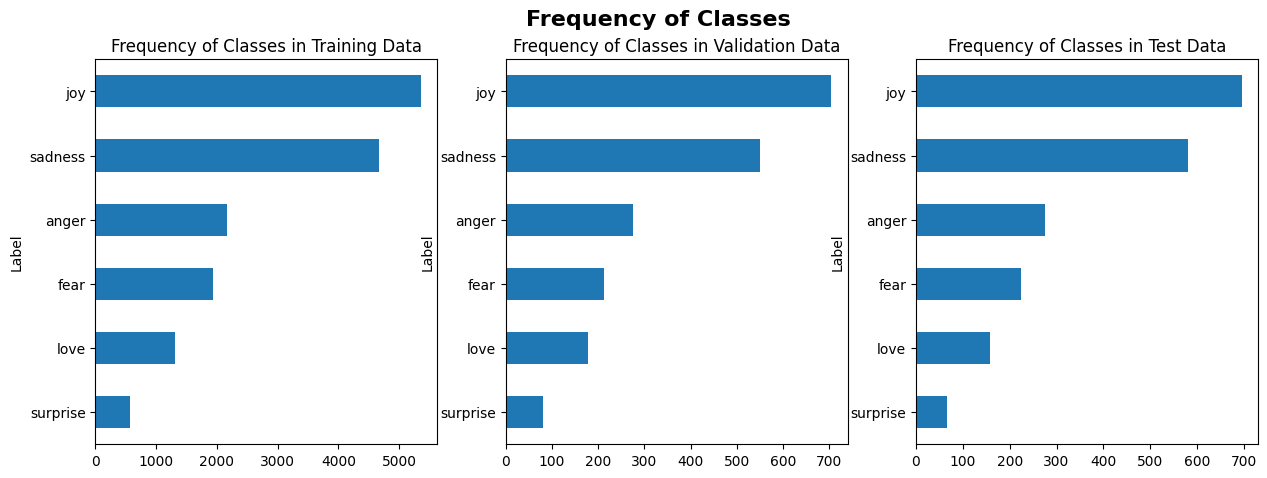

In [14]:
plt.subplots(figsize=(15,5))

plt.subplot(1,3,1)
df_train["emotion_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes in Training Data")
plt.ylabel("Label")

plt.subplot(1,3,2)
df_val["emotion_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes in Validation Data")
plt.ylabel("Label")

plt.subplot(1,3,3)
df_test["emotion_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes in Test Data")
plt.ylabel("Label")

plt.suptitle("Frequency of Classes", fontsize=16, fontweight='bold')
plt.show()


In [15]:
# Concat Train and Val Set to get a better overview of whole Training Set

train_set = pd.concat([df_train, df_val], axis=0)

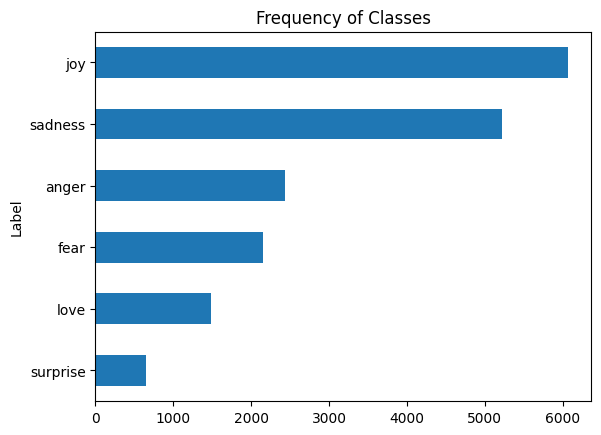

In [16]:
train_set["emotion_name"].value_counts(ascending=True).plot.barh()
plt.ylabel("Label")
plt.title("Frequency of Classes")
plt.show()

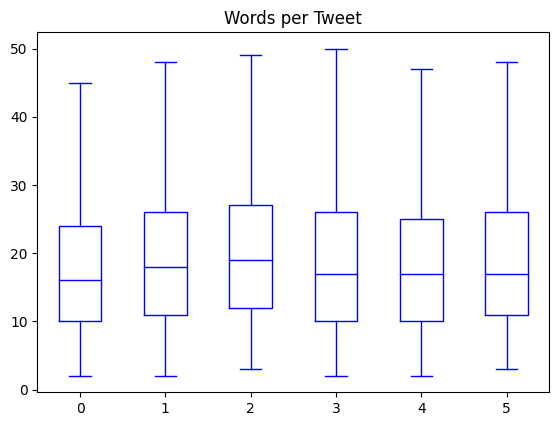

In [17]:
train_set["Words per Tweet"] = train_set["text"].str.split().apply(len)
train_set.boxplot("Words per Tweet", by="label", grid=False, showfliers=False, color="blue")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [18]:
# Reset format of Emotions Dataset

emotions.reset_format()

In [19]:
emotions["train"]

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

# **Import pre-trained Model DistilBERT**

In [20]:
from transformers import AutoTokenizer

model = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

# **Tokenization**

In [21]:
def tokenize(data):
    return tokenizer(data["text"], padding=True, truncation=True, return_tensors="tf")

In [22]:
emotions_encoded = emotions.map(tokenize, batched = True, batch_size = None) # token encodings train set

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [23]:
emotions_encoded["validation"].column_names

['text', 'label', 'input_ids', 'attention_mask']

# **Train Model on Twitter Dataset**

**1. Feature Extraction**

In [24]:
from transformers import TFAutoModel

bert_model = TFAutoModel.from_pretrained(model)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [25]:
# Get hidden States for Feature Extraction

def extract_hidden_states(batch):
    #inputs = {key: tf.convert_to_tensor(batch[key]) for key in batch.keys() if key != "label"}
    inputs = tokenizer(batch["text"], padding=True,
                       truncation=True, return_tensors='tf')
    outputs = bert_model(inputs)
    hidden_states = outputs.last_hidden_state[:, 0].numpy()
    return {"hidden_states": hidden_states}

In [26]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

/usr/local/lib/python3.10/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [27]:
X_train = np.array(emotions_hidden["train"]["hidden_states"])
X_val = np.array(emotions_hidden["validation"]["hidden_states"])

In [28]:
y_train = np.array(emotions_hidden["train"]["label"])
y_val = np.array(emotions_hidden["validation"]["label"])

In [29]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 8.9 MB/s eta 0:00:00


In [30]:
# Visualize the Training Set in a 2D

from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X_train)

mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)

df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,4.204136,6.539186,0
1,-3.207630,5.957094,0
2,5.169965,3.028280,3
3,-2.660137,3.994928,2
4,-3.547975,4.005586,3


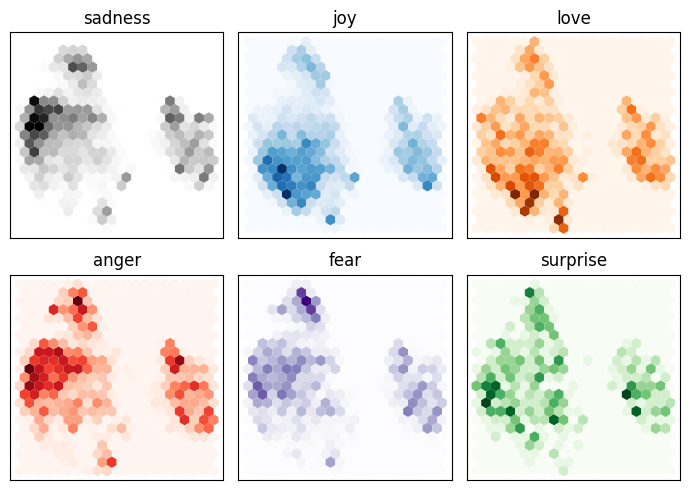

In [31]:
fig, axes = plt.subplots(2,3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names
#labels = np.unique(emotions_train["train"]["label"])


for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label=={i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                  gridsize=20, linewidth=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

**Using some base Models**

In [32]:
from xgboost import XGBClassifier

In [33]:
xgb_clf = XGBClassifier()

xgb_clf.fit(X_train, y_train)

xgb_clf.score(X_val, y_val)

0.5735

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
log_clf = LogisticRegression(max_iter=3000)

log_clf.fit(X_train, y_train)

log_clf.score(X_val, y_val)

0.633

****Evaluation****

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [37]:
model1 = "XGBoost Classifier"
model2 = "Logistic Regression"

def confusion_matrix_plot(y_pred, y_true, labels, clf):
    cm = confusion_matrix(y_true, y_pred, normalize="true")
    fig, ax = plt.subplots(figsize=(6,6))
    confm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
    confm.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title(f"Normalized confusion matrix {clf}")
    plt.show()

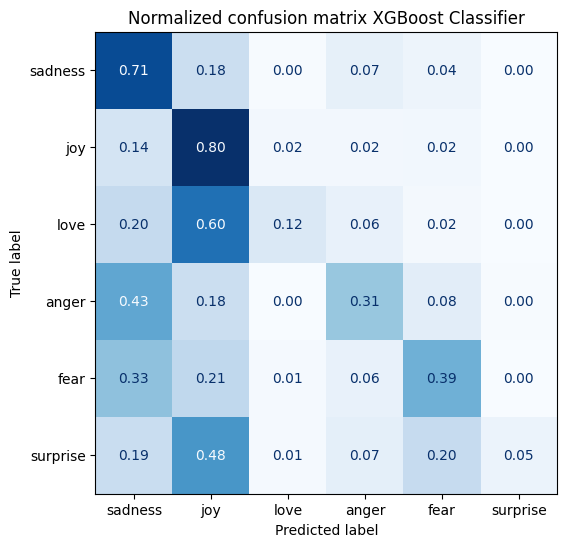

In [38]:
# XGB Classifier Confusion Matrix

y_pred_xgb = xgb_clf.predict(X_val)
confusion_matrix_plot(y_pred_xgb, y_val, labels, model1)

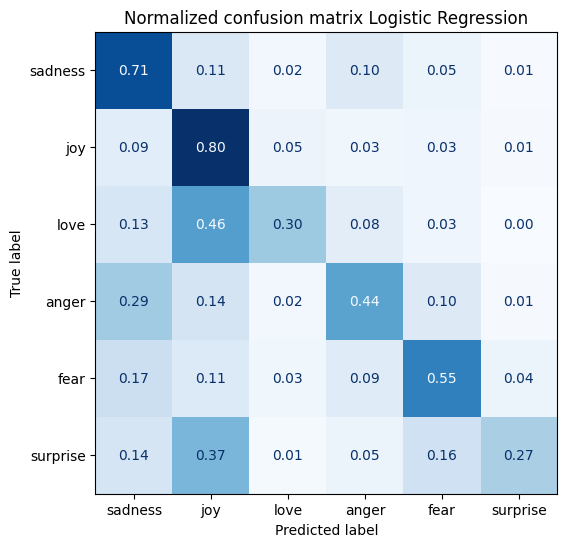

In [39]:
# Logistic Regression Confusion Matrix

y_pred_log = log_clf.predict(X_val)
confusion_matrix_plot(y_pred_log, y_val, labels, model2)

**2. Fine-Tuning**

In [40]:
from transformers import TFAutoModelForSequenceClassification

In [41]:
num_labels = 6
batch_size = 64
tf_model = TFAutoModelForSequenceClassification.from_pretrained(model, num_labels=num_labels)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [42]:
# Label Encoding for TF Model

# labels_train = emotions_encoded["train"]["label"]
# labels_val = emotions_encoded["train"]["label"]

# label_encoded_train = le.fit_transform(labels_train)
# emotions_encoded["train"] = emotions_encoded["train"].add_column("encoded_label", label_encoded_train)

# label_encoded_val = le.fit_transform(labels_val)
# emotions_encoded["train"] = emotions_val_encoded["train"].add_column("encoded_label", label_encoded_val)

In [43]:
tokenizer_columns = tokenizer.model_input_names

tf_train =  emotions_encoded["train"].to_tf_dataset(columns=tokenizer_columns, label_cols=["label"],
                                                          shuffle=True,
                                                          batch_size=batch_size)

tf_val = emotions_encoded["validation"].to_tf_dataset(columns=tokenizer_columns, label_cols=["label"],
                                                     shuffle=False,
                                                     batch_size=batch_size)

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:410: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [44]:
tf_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [45]:
tf_model.fit(tf_train, validation_data=tf_val, epochs=3)

Epoch 1/3


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
250/250 [==============================] - 185s 545ms/step - loss: 0.5098 - sparse_categorical_accuracy: 0.8223 - val_loss: 0.1611 - val_sparse_categorical_accuracy: 0.9345
Epoch 2/3
250/250 [==============================] - 136s 544ms/step - loss: 0.1368 - sparse_categorical_accuracy: 0.9417 - val_loss: 0.1282 - val_sparse_categorical_accuracy: 0.9410
Epoch 3/3
250/250 [==============================] - 136s 545ms/step - loss: 0.1019 - sparse_categorical_accuracy: 0.9522 - val_loss: 0.1756 - val_sparse_categorical_accuracy: 0.9315


In [46]:
y_pred_tf = tf_model.predict(tf_val)

32/32 [==============================] - 8s 144ms/step


In [47]:
# Predictet Labels from Model

logits = y_pred_tf.logits
y_preds = np.argmax(logits, axis=1)

print("Predicted Labels:", y_preds)

Predicted Labels: [0 0 1 ... 1 2 1]


In [48]:
# Get true Labels

def extract_labels(features, labels):
    return labels

y_true = tf_val.map(extract_labels)

y_true = tf.concat(list(y_true.as_numpy_iterator()), axis=0)
print(y_true)

tf.Tensor([0 0 2 ... 1 1 1], shape=(2000,), dtype=int64)


**Evaluation**

In [49]:
# Metrics which we use to evaluate the model

from sklearn.metrics import accuracy_score, f1_score

def evaluate_model(y_true, y_prediction):
    f1 = f1_score(y_true, y_preds, average="weighted")
    acc = accuracy_score(y_true, y_preds)
    return {"Accuarcy": acc, "f1": f1}

In [50]:
evaluate_model(y_true, y_preds)

{'Accuarcy': 0.9315, 'f1': 0.9311923109666166}

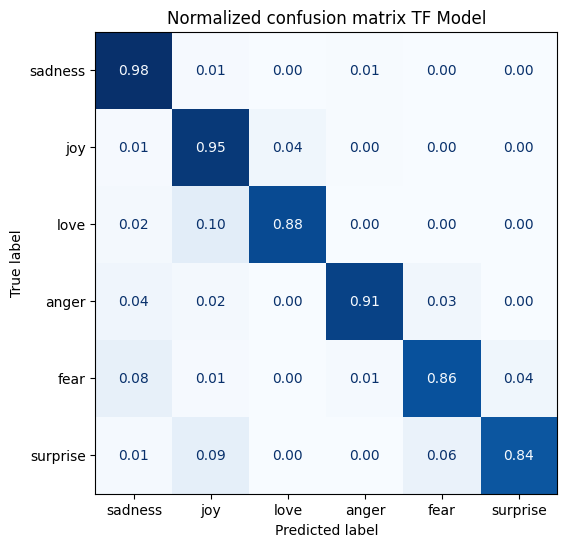

In [51]:
# Confusion Matrix

confusion_matrix_plot(y_preds, y_true, labels, "TF Model")


In [52]:
df_val["predicted_labels"] = y_preds

In [55]:
df_val.head(20)

,text,label,emotion_name,predicted_labels
0,im feeling quite sad and sorry for myself but ...,0,sadness,0
1,i feel like i am still looking at a blank canv...,0,sadness,0
2,i feel like a faithful servant,2,love,1
3,i am just feeling cranky and blue,3,anger,3
4,i can have for a treat or if i am feeling festive,1,joy,1
5,i start to feel more appreciative of what god ...,1,joy,1
6,i am feeling more confident that we will be ab...,1,joy,1
7,i feel incredibly lucky just to be able to tal...,1,joy,1
8,i feel less keen about the army every day,1,joy,1
9,i feel dirty and ashamed for saying that,0,sadness,0


In [54]:
# Display some examples

for i in range(20):
    predicted_label_index = y_preds[i]
    predicted_label = df_val["emotion_name"][predicted_label_index]
    true_label_index = int(y_true[i])
    true_label = true_label_index

    print(f"Predicted Label: {predicted_label}\nTrue Label: {true_label}\nText: {emotions_encoded['validation']['text'][i]}\n\n")


Predicted Label: sadness
True Label: 0
Text: im feeling quite sad and sorry for myself but ill snap out of it soon


Predicted Label: sadness
True Label: 0
Text: i feel like i am still looking at a blank canvas blank pieces of paper


Predicted Label: sadness
True Label: 2
Text: i feel like a faithful servant


Predicted Label: anger
True Label: 3
Text: i am just feeling cranky and blue


Predicted Label: sadness
True Label: 1
Text: i can have for a treat or if i am feeling festive


Predicted Label: sadness
True Label: 1
Text: i start to feel more appreciative of what god has done for me


Predicted Label: sadness
True Label: 1
Text: i am feeling more confident that we will be able to take care of this baby


Predicted Label: sadness
True Label: 1
Text: i feel incredibly lucky just to be able to talk to her


Predicted Label: sadness
True Label: 1
Text: i feel less keen about the army every day


Predicted Label: sadness
True Label: 0
Text: i feel dirty and ashamed for saying that


P